In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [3]:
movies = pd.read_csv("../data/cleaned_data/movies_clean.csv")
ratings = pd.read_csv("../data/cleaned_data/ratings_clean.csv")

In [4]:
ratings["year"] = pd.to_datetime(ratings["timestamp"]).dt.year

ratings_per_year = (
    ratings
    .groupby("year")
    .size()
    .reset_index(name="num_ratings")
)


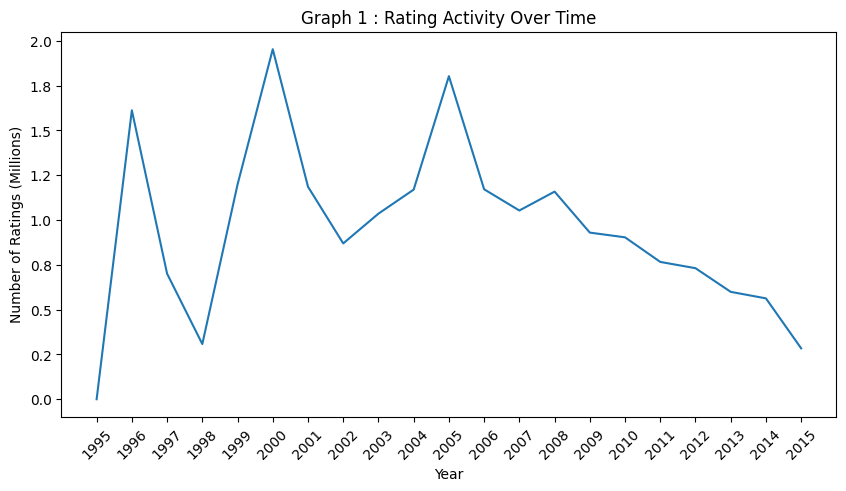

In [13]:
#HOW HAS USER RATING ACTIVITY CHANGED OVER TIME?
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 5),dpi = 100)
plt.plot(ratings_per_year["year"], ratings_per_year["num_ratings"])
plt.xlabel("Year")
plt.ylabel("Number of Ratings (Millions)")
plt.title("Graph 1 : Rating Activity Over Time")
plt.xticks(ratings_per_year["year"].unique(), rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))

plt.show()

In [ ]:
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
movies_exploded = movies.explode('genre_list')
genre_counts = (
    movies_exploded
    .groupby(['release_year', 'genre_list'])
    .size()
    .reset_index(name='count')
)

top_genres = (
    genre_counts[genre_counts["release_year"].isin([1998.0, 2002.0, 2007.0])]
    .sort_values(["release_year", "count"], ascending=[True, False])
    .groupby("release_year")
    .head(2)
    .reset_index(drop=True)
)

print("Top 2 genres released in 1998, 2002, and 2007:")
print(top_genres[['release_year', 'genre_list', 'count']])

Top 2 genres released in 1998, 2002, and 2007:
   release_year       genre_list  count
0        1998.0        ['Drama']    100
1        1998.0       ['Comedy']     42
2        2002.0        ['Drama']    119
3        2002.0  ['Documentary']     51
4        2007.0        ['Drama']    140
5        2007.0  ['Documentary']    100


In [ ]:
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
movies_exploded = movies.explode('genre_list')
genre_counts = (
    movies_exploded
    .groupby(['release_year', 'genre_list'])
    .size()
    .reset_index(name='count')
)

top_genres = (
    genre_counts[genre_counts["release_year"].isin([1996.0, 2000.0, 2005.0])]
    .sort_values(["release_year", "count"], ascending=[True, False])
    .groupby("release_year")
    .head(2)
    .reset_index(drop=True)
)

print("Top 2 genres released in 1996, 2000, and 2005:")
print(top_genres[['release_year', 'genre_list', 'count']])

Top 2 genres released in 1996, 2000, and 2005:
   release_year       genre_list  count
0        1996.0        ['Drama']     95
1        1996.0       ['Comedy']     66
2        2000.0        ['Drama']    116
3        2000.0       ['Comedy']     57
4        2005.0        ['Drama']    126
5        2005.0  ['Documentary']     78


In [11]:
# Get the number of movies released in dip years vs peak years
dip_years = [1998.0, 2002.0, 2007.0]
peak_years = [1996.0, 2000.0, 2005.0]

dip_counts = genre_counts[genre_counts["release_year"].isin(dip_years)].groupby("release_year").size()
peak_counts = genre_counts[genre_counts["release_year"].isin(peak_years)].groupby("release_year").size()

print("Number of movies released in dip years:")
print(dip_counts)
print(f"\nTotal dip years: {dip_counts.sum()}")


print("Number of movies released in peak years:")
print(peak_counts)
print(f"\nTotal peak years: {peak_counts.sum()}")

print(f"Difference: Peak years had {peak_counts.sum() - dip_counts.sum()} more movies than dip years")

Number of movies released in dip years:
release_year
1998.0    163
2002.0    176
2007.0    207
dtype: int64

Total dip years: 546
Number of movies released in peak years:
release_year
1996.0    130
2000.0    147
2005.0    197
dtype: int64

Total peak years: 474
Difference: Peak years had -72 more movies than dip years


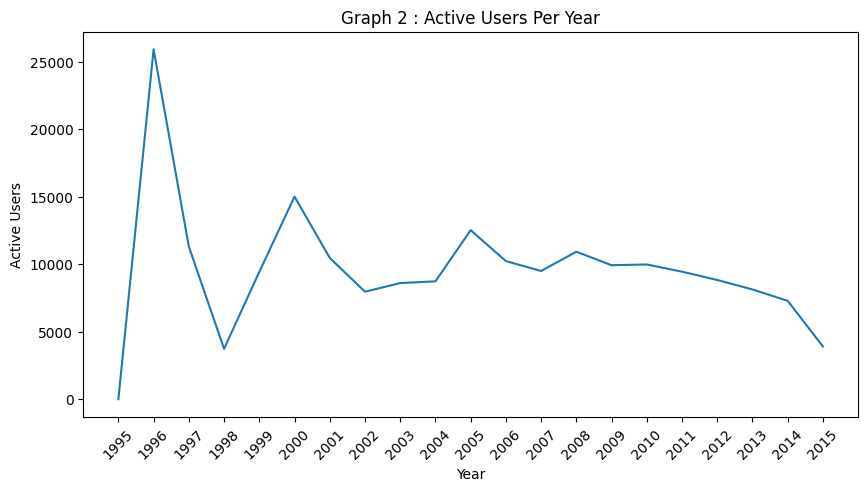

In [9]:
active_users_per_year = (
    ratings
    .groupby("year")["userId"]
    .nunique()
    .reset_index(name="num_users")
)

plt.figure(figsize=(10, 5))
plt.plot(active_users_per_year["year"], active_users_per_year["num_users"])
plt.xlabel("Year")
plt.ylabel("Active Users")
plt.title("Graph 2 : Active Users Per Year")
plt.xticks(ratings_per_year["year"].unique(), rotation=45)
plt.show()


**WE CAN SEE ACTIVE USERS ALSO DIPPED IN THE YEARS MOVIES WERE RATED LESS**

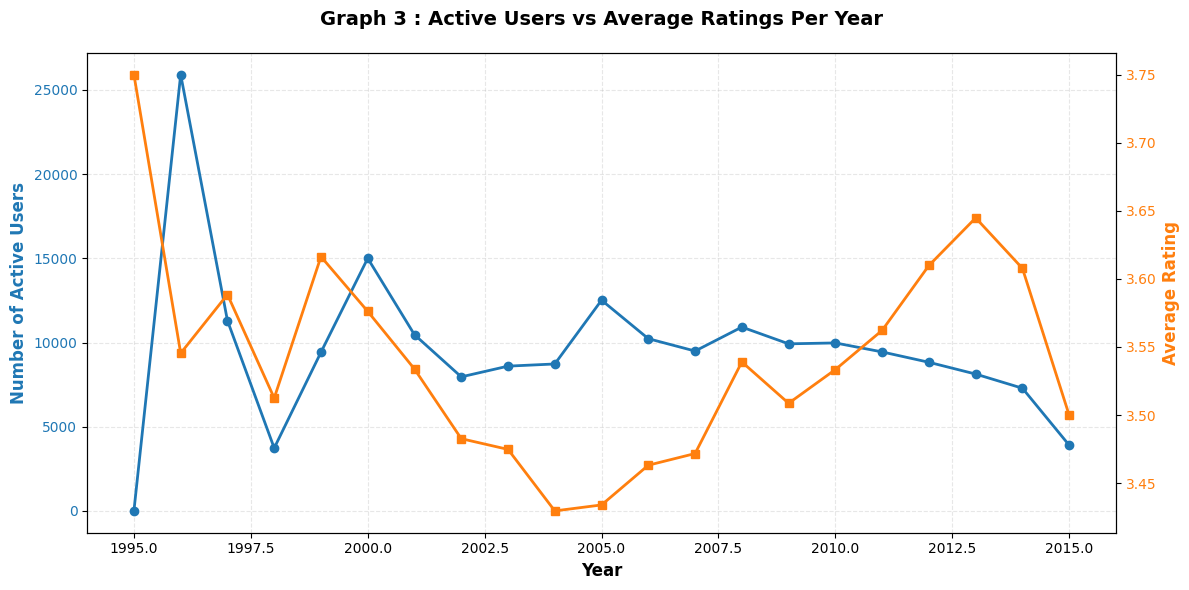

    year  active_users  avg_rating
0   1995             2    3.750000
1   1996         25915    3.545408
2   1997         11305    3.588522
3   1998          3734    3.512484
4   1999          9426    3.616337
5   2000         15004    3.576119
6   2001         10464    3.533771
7   2002          7963    3.482654
8   2003          8600    3.474775
9   2004          8729    3.429614
10  2005         12517    3.434001
11  2006         10230    3.463172
12  2007          9496    3.471741
13  2008         10920    3.539019
14  2009          9925    3.508644
15  2010          9978    3.533408
16  2011          9444    3.562192
17  2012          8829    3.609827
18  2013          8129    3.644767
19  2014          7288    3.607711
20  2015          3903    3.499819


In [10]:
users_per_year = (
    ratings
    .groupby("year")["userId"]
    .nunique()
    .reset_index(name="active_users")
)

avg_ratings_per_year = (
    ratings
    .groupby("year")["rating"]
    .mean()
    .reset_index(name="avg_rating")
)

year_data = users_per_year.merge(avg_ratings_per_year, on="year")

fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Active Users', color=color1, fontsize=12, fontweight='bold')
ax1.plot(year_data["year"], year_data["active_users"], color=color1, marker='o', linewidth=2, markersize=6, label='Active Users')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--')

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Average Rating', color=color2, fontsize=12, fontweight='bold')
ax2.plot(year_data["year"], year_data["avg_rating"], color=color2, marker='s', linewidth=2, markersize=6, label='Average Rating')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Graph 3 : Active Users vs Average Ratings Per Year', fontsize=14, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print(year_data)